In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2023-10-09 21:20:39.293934: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_dir='data/train'
test_dir='data/test'  

In [3]:
resnet_weights_path = 'data/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [4]:
num_classes = 2

In [5]:
class_names = sorted(os.listdir(train_dir))

In [6]:
my_new_model = Sequential()

In [7]:
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights= resnet_weights_path ))

In [8]:
my_new_model.add(Dense(num_classes, activation='softmax'))

In [9]:
my_new_model.layers[0].trainable = False

In [10]:
my_new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23591810 (90.00 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [11]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
image_size = 224

In [13]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [15]:
train_generator = data_generator.flow_from_directory(
        'data/train',
        target_size=(image_size, image_size),
        batch_size=32,
        class_mode='categorical')

Found 4733 images belonging to 2 classes.


In [16]:
validation_generator = data_generator.flow_from_directory(
        'data/test',
        target_size=(image_size, image_size),
        batch_size=32,
        class_mode='categorical')

Found 1184 images belonging to 2 classes.


In [17]:
Modelf = my_new_model.fit(
        train_generator,
        epochs=20,
        steps_per_epoch= 20,
        validation_data=validation_generator,
        validation_steps=7)

Epoch 1/20
20/20 [==============================] - 62s 3s/step - loss: 0.1381 - accuracy: 0.9625 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 2/20
20/20 [==============================] - 56s 3s/step - loss: 0.0674 - accuracy: 0.9766 - val_loss: 0.0424 - val_accuracy: 0.9911
Epoch 3/20
20/20 [==============================] - 63s 3s/step - loss: 0.0415 - accuracy: 0.9875 - val_loss: 0.0267 - val_accuracy: 0.9955
Epoch 4/20
20/20 [==============================] - 59s 3s/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 5/20
20/20 [==============================] - 61s 3s/step - loss: 0.0297 - accuracy: 0.9953 - val_loss: 0.0198 - val_accuracy: 0.9955
Epoch 6/20
20/20 [==============================] - 81s 4s/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0461 - val_accuracy: 0.9821
Epoch 7/20
20/20 [==============================] - 551s 29s/step - loss: 0.0304 - accuracy: 0.9937 - val_loss: 0.0433 - val_accuracy: 0.9866
Epoch 8/20
20/20 [

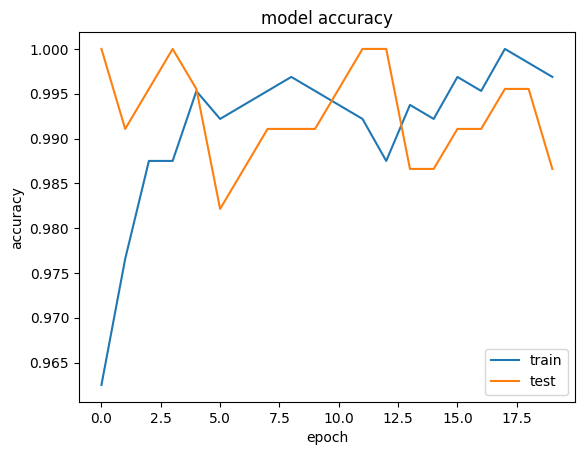

In [18]:

# summarize history for accuracy
plt.plot(Modelf.history[ 'accuracy' ])
plt.plot(Modelf.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'lower right' )
plt.show()

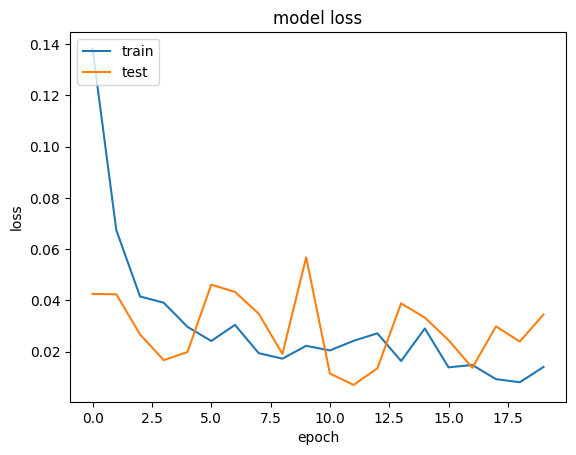

In [19]:
# summarize history for loss
plt.plot(Modelf.history[ 'loss' ])
plt.plot(Modelf.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()

Chihuaha


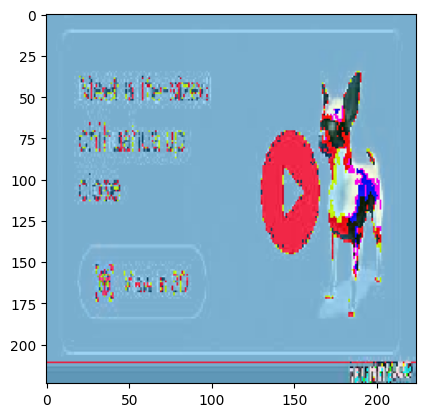

Chihuaha


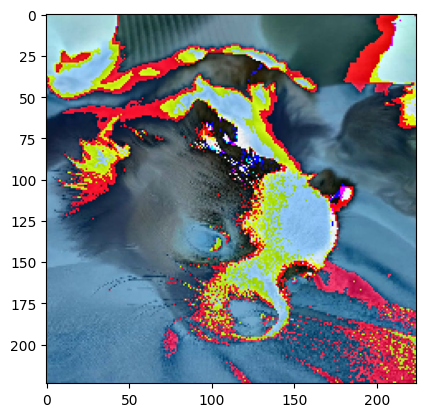

Muffin


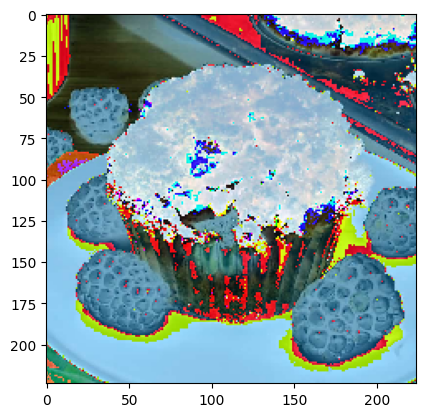

Muffin


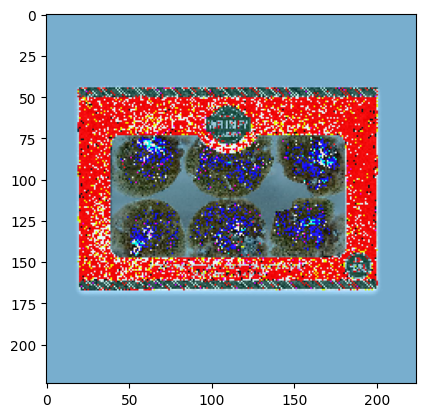

Chihuaha


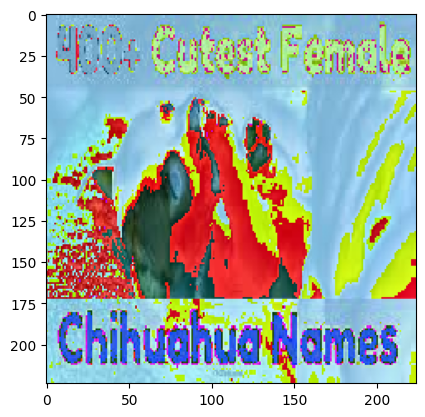

Chihuaha


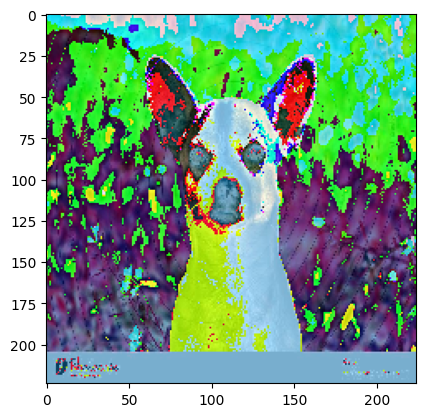

Chihuaha


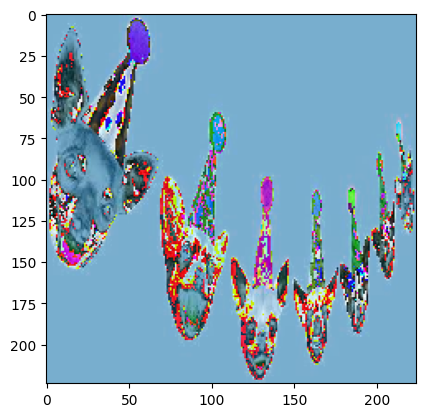

Muffin


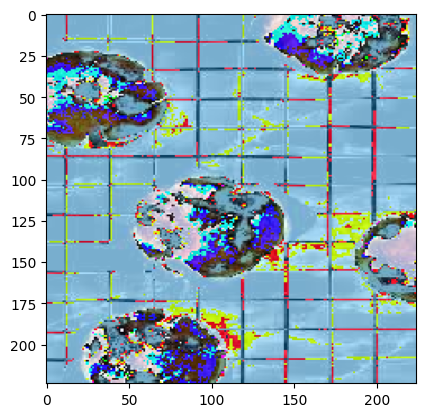

Chihuaha


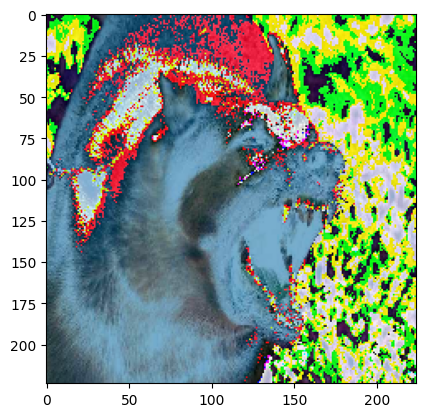

In [30]:
x,y = train_generator.next()
for i in range(0,9):
    image = x[i]
    label = y[i]
    if label[0] == 1:
        print("Chihuaha")
    else:
        print("Muffin")
    
    image = (image * 255).astype('uint8')
    
    plt.imshow(image)
    plt.show()